# Data Acquistion


#### Headers

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
import requests

import matplotlib.cm as cm
import matplotlib.colors as colors

import folium
from geopy.geocoders import Nominatim

In [2]:
client_id = 'ZQFK2A1YUACY2KB5JKHCJTDBAGERBSTBWA2NNWYIWEDDQDYS' # your Foursquare ID
client_secret = '0MLL5A3QAH5VEKO43LSFIQRIZF45EM4QQ5AN23FGRLMROVUN' # your Foursquare Secret
version = '20200510' # Foursquare API version

url_base = 'https://api.foursquare.com/v2/'
url_cred = '&client_id={}&client_secret={}&v={}'.format(
            client_id,
            client_secret,
            version)

#### Initialize analysis parameters

In [3]:
category = 'Coffee Shop';
category_id = '4bf58dd8d48988d1e0931735';
#category_id = '5e18993feee47d000759b256'
address = 'Los Angeles, CA';

In [4]:
# ideally can retrieve the category_id for any category chosen by user
#url = url_base + 'venues/categories?' + url_cred
#results = requests.get(url).json()


In [113]:
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
la_latitude = location.latitude
la_longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(la_latitude, la_longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


**Upload a list of Los Angeles zip codes to guide foursquare search queries**

In [6]:
zip_data = json.load(open('zips.json'))

zips_list=[]
zips_list.append([(zip_data['data'][n][8],
                   zip_data['data'][n][9],
                   float(zip_data['data'][n][15][1]),
                   float(zip_data['data'][n][15][2])) for n in range(0,np.shape(zip_data['data'])[0])])
                  
zips = pd.DataFrame([item for zips_list in zips_list for item in zips_list])
zips.columns = ['Zip Code',
                'City', 
                'Latitude', 
                'Longitude']

zips

,Zip Code,City,Latitude,Longitude
0,90713,Lakewood,33.848711,-118.113579
1,91306,Winnetka,34.208404,-118.575940
2,90002,Los Angeles,33.948951,-118.246980
3,90506,Torrance,33.885353,-118.326597
4,90069,West Hollywood,34.089403,-118.379789
...,...,...,...,...
365,90011,Los Angeles,34.007904,-118.259037
366,90247,Gardena,33.891892,-118.298498
367,90601,Whittier,33.995473,-118.040466
368,90630,Cypress,33.820143,-118.039810


**Visualization of Zip Codes to check search coverage**

In [7]:
map_la = folium.Map(location=[latitude, longitude], zoom_start=8.2)

# add markers to map
for x, y, z in zip(zips['Latitude'], zips['Longitude'], zips['City']):
    label = folium.Popup(z, parse_html=True)
    folium.CircleMarker(
        [x, y],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_la)  

map_la

#### Execute search for a single zip code to calibrate range

In [8]:
lat = 33.891892
lon = -118.298498
radius = 16000 # ~10 miles

url = url_base + 'venues/search?' + url_cred + '&ll={},{}&intent=browse&categoryId={}&radius={}&&limit=50'.format(
        lat,
        lon,
        category_id,
        radius
        )

results = requests.get(url).json()['response']

In [9]:
df = results

In [10]:
# organize usable inforamtion into a dataframe
venues_list=[]
venues_list.append([( 
            df['venues'][n]['id'],
            df['venues'][n]['name'], 
            df['venues'][n]['location']['lat'], 
            df['venues'][n]['location']['lng'],  
            df['venues'][n]['categories'][0]['name']) for n,v in enumerate(df['venues'])])

venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
venues.columns = ['id',
                  'Venue', 
                  'Latitude', 
                  'Longitude', 
                  'Category']

venues

,id,Venue,Latitude,Longitude,Category
0,5902ef3135811b1b51866249,Starbucks,33.864635,-118.352087,Coffee Shop
1,5a0c8104175562712f2a48e2,Starbucks,33.977573,-118.369694,Coffee Shop
2,57ec3ca8cd10ed3ea1bd21bf,Starbucks,34.025279,-118.239667,Coffee Shop
3,4a808d4ff964a52096f51fe3,Bristol Farms Westchester,33.961131,-118.419123,Grocery Store
4,5776e8a2498ea36b4e6799e9,Starbucks,33.930336,-118.353057,Coffee Shop
5,5d94a630aee06900087e9801,Starbucks,33.889335,-118.161309,Coffee Shop
6,4be17eab8e2962b5d8579b0a,Starbucks,33.947296,-118.333170,Coffee Shop
7,4b2e8f42f964a52079e224e3,Starbucks,33.863404,-118.392152,Coffee Shop
8,4b75769ef964a520ee0d2ee3,Starbucks,33.924318,-118.325842,Coffee Shop
9,4b0d85e5f964a520214a23e3,The Coffee Bean & Tea Leaf,33.848442,-118.354164,Coffee Shop


**Now lets do it over all coordinates**

In [11]:
radius = 16000
venues_total = pd.DataFrame({'id':[], 'Venue':[], 'Latitude':[], 'Longitude':[], 'Category':[]});

for lat, lon in zip(zips['Latitude'],zips['Longitude']):
    url = url_base + 'venues/search?' + url_cred + '&ll={},{}&intent=browse&categoryId={}&radius={}&&limit=50'.format(
        lat,
        lon,
        category_id,
        radius
        )

    df = requests.get(url).json()['response']
    
    venues_list=[]
    if(len(df['venues']) > 0):
        venues_list.append([( 
            df['venues'][n]['id'],
            df['venues'][n]['name'], 
            df['venues'][n]['location']['lat'], 
            df['venues'][n]['location']['lng'],  
            df['venues'][n]['categories'][0]['name']) for n,v in enumerate(df['venues'])])
    
        venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])

        venues.columns = ['id',
                      'Venue', 
                      'Latitude', 
                      'Longitude', 
                      'Category']
    
    
        venues_total = pd.concat([venues_total, venues])

venues_total

,id,Venue,Latitude,Longitude,Category
0,5ca92221e65d0c0039079c99,Starbucks,33.789590,-118.139410,Coffee Shop
1,56426e4b498ef77ac0e8f023,Dunkin',33.737575,-118.006568,Donut Shop
2,5e49893cc0c7c40008c1eb57,Ubuntu Cafe,33.769350,-118.133134,Café
3,4b6989c6f964a52080a62be3,Starbucks,33.912378,-118.082175,Coffee Shop
4,5068eeb5e4b0846a5b70ba76,Starbucks,33.858353,-118.030366,Coffee Shop
...,...,...,...,...,...
42,4f44708319836ed001941be3,Out for Coffee,34.105600,-117.601000,Coffee Shop
43,4e56cdc845dd1627330fa0b4,Starbucks At Chaffey College Panther Express,34.153614,-117.561158,Coffee Shop
44,4ca65d38d971b1f74668ffe0,Starbucks,34.108158,-117.652964,Coffee Shop
45,52328f76498e0cb35be6752e,Starbucks,34.104140,-117.703228,Coffee Shop


**Since we were generous with our radial consideration, we should remove any duplicate stores**

In [13]:
venues_clean = venues_total.drop_duplicates('id')

venues_clean.shape

(767, 5)

**We're only going to consider venues labelled 'Coffee Shop' or 'Cafe'**

In [14]:
venues_clean = pd.concat([venues_clean[venues_clean['Category'] == 'Coffee Shop'],venues_clean[venues_clean['Category'] == 'Café']])
venues_clean.reset_index(drop=True,inplace=True)
venues_clean

,id,Venue,Latitude,Longitude,Category
0,5ca92221e65d0c0039079c99,Starbucks,33.789590,-118.139410,Coffee Shop
1,4b6989c6f964a52080a62be3,Starbucks,33.912378,-118.082175,Coffee Shop
2,5068eeb5e4b0846a5b70ba76,Starbucks,33.858353,-118.030366,Coffee Shop
3,5be8d77af2554e002c2c0059,Starbucks,33.846213,-118.084575,Coffee Shop
4,4b5a5753f964a5208fbe28e3,Starbucks,33.838448,-117.958654,Coffee Shop
...,...,...,...,...,...
681,5e03e470bd059b00088b18c5,Starbucks,33.649843,-117.953033,Café
682,5ab4a38462420b3209f7511a,Bluestone Lane,34.021440,-118.495910,Café
683,5154f8fde889ae67b8016eb7,Demitasse,34.018550,-118.499679,Café
684,4fff4694d86ca830b838b5cc,Dogtown Coffee,34.007124,-118.488723,Café


**We're also going to exclude coffee chains**

In [15]:
venues_clean = venues_clean[venues_clean['Venue'] != 'Starbucks']
venues_clean = venues_clean[venues_clean['Venue'] != 'The Coffee Bean & Tea Leaf']
venues_clean = venues_clean[venues_clean['Venue'] != 'Coffee Bean & Tea Leaf']

venues_clean.shape

(278, 5)

**Gather metrics on how well each of them does**

In [17]:
metrics_total = pd.DataFrame({'Likes':[], 'Price':[], 'Rating':[]});

for n in venues_clean['id']:
   
    # get the number of likes
    url = url_base + 'venues/{}?'.format(n) + url_cred
    df = requests.get(url).json()['response']['venue']
    
    metric_list = []
    metric_list.append([(df['likes']['count'],
                       df['price']['tier'],
                       df['rating'] if ('rating' in df.keys()) else "")]) 
    
    metrics = pd.DataFrame([item for metric_list in metric_list for item in metric_list])
    metrics.columns = ['Likes',
                      'Price', 
                      'Rating']
    
    metrics_total = pd.concat([metrics_total,metrics])
    
metrics_total

,Likes,Price,Rating
0,1.0,1.0,7.6
0,17.0,1.0,8.3
0,9.0,1.0,8
0,69.0,1.0,8.6
0,23.0,1.0,8.3
...,...,...,...
0,2.0,1.0,
0,30.0,1.0,8.7
0,254.0,2.0,8.4
0,343.0,1.0,8.4


**Combine metric data with venue data**

In [52]:
# Combine metric data with venue data
test = venues_clean
test.reset_index(drop=True,inplace=True)

test2 = metrics_total.reset_index(drop=True)
test = pd.concat([test,test2],axis=1)

# only looking at venues with ratings
test = test[test['Rating'] != ""]
test.reset_index(drop=True,inplace=True)
test

,id,Venue,Latitude,Longitude,Category,Likes,Price,Rating
0,5d094cd247f876002c7ec6d2,Panera Bread,33.917750,-118.065352,Coffee Shop,1.0,1.0,7.6
1,599f8123db1d817a92eb70bd,7 Leaves Cafe,33.872932,-118.072761,Coffee Shop,17.0,1.0,8.3
2,5c1d8c70340a58002c249daf,Philz Coffee,33.761676,-118.137816,Coffee Shop,9.0,1.0,8
3,524b969a11d2c949b514bd2a,Tierra Mia Coffee,33.930171,-118.183456,Coffee Shop,69.0,1.0,8.6
4,4a834324f964a5208cfa1fe3,It's A Grind Coffee House,33.811510,-118.115977,Coffee Shop,23.0,1.0,8.3
...,...,...,...,...,...,...,...,...
128,50d7e570e4b0f53596b82ab6,Barnes & Noble Café,34.153402,-118.644115,Café,0.0,1.0,6.4
129,5ab4a38462420b3209f7511a,Bluestone Lane,34.021440,-118.495910,Café,30.0,1.0,8.7
130,5154f8fde889ae67b8016eb7,Demitasse,34.018550,-118.499679,Café,254.0,2.0,8.4
131,4fff4694d86ca830b838b5cc,Dogtown Coffee,34.007124,-118.488723,Café,343.0,1.0,8.4


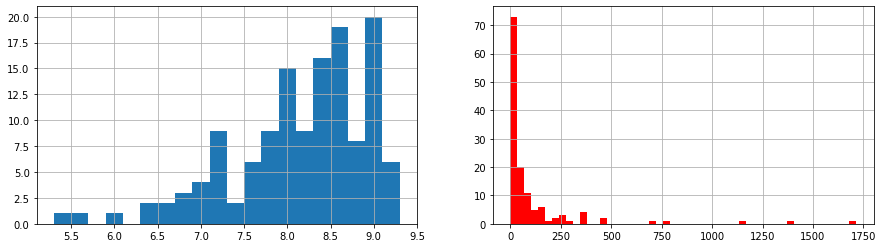

In [53]:
fig,axs = plt.subplots(1,2);
fig.set_figwidth(15)

test['Rating'].hist(ax=axs[0],bins=20);
test['Likes'].hist(ax=axs[1],bins=50,color='r');

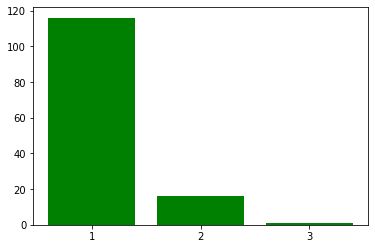

In [54]:
plt.bar(['1','2','3'],test['Price'].value_counts().to_list(),color='g');

**I want to predict these metrics from nearby venues** \
So, I need to repeat this process for every venue I have cleaned from my original dataset

In [56]:
radius=200

nearby_venues = pd.DataFrame({'id':[], 'Venue':[], 'Latitude':[], 'Longitude':[], 'Category':[], 'Distance':[]});
nearby_df = pd.DataFrame({'Diversity':[], 'Competition':[], 'Number Nearby':[]})
closest_venues = pd.DataFrame({'1st Closest':[],'2nd Closest':[],'3rd Closest':[],'4th Closest':[],'5th Closest':[]})

for latitude, longitude in zip(test['Latitude'],test['Longitude']):
    url = url_base + 'venues/explore?' + url_cred + '&ll={},{}&radius={}&limit=50'.format(
        latitude,
        longitude,
        radius)

    df = requests.get(url).json()['response']['groups'][0]['items']
    
    venues_list=[]
    if(len(df) > 0):
        venues_list.append([( 
            df[n]['venue']['id'],
            df[n]['venue']['name'], 
            df[n]['venue']['location']['lat'], 
            df[n]['venue']['location']['lng'],  
            df[n]['venue']['categories'][0]['name'],
            df[n]['venue']['location']['distance']) for n,v in enumerate(df)])
    venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])

    venues.columns = ['id',
                      'Venue', 
                      'Latitude', 
                      'Longitude', 
                      'Category',
                      'Distance']
    venues = venues.sort_values('Distance')
    venues.reset_index(drop=True,inplace=True)

    if (len(venues['Category'].values) - 1)>=5:
        closest = pd.DataFrame([(venues['Category'].values[1],
                                 venues['Category'].values[2],
                                 venues['Category'].values[3],
                                 venues['Category'].values[4],
                                 venues['Category'].values[5])])
    else:
        closest = pd.DataFrame([('','','','','')])
    
    closest.columns = ['1st Closest',
                       '2nd Closest',
                       '3rd Closest',
                       '4th Closest',
                       '5th Closest']
    closest_venues = pd.concat([closest_venues,closest])

    div = len(venues['Category'].unique())
    comp = len(venues[venues['Category']=='Coffee Shop']) - 1
    num_places = venues.shape[0]

    nearby_metrics = pd.DataFrame([(int(div),int(comp),int(num_places))])
    nearby_metrics.columns = ['Diversity',
                              'Competition',
                              'Number Nearby']

    nearby_df = pd.concat([nearby_df,nearby_metrics])

closest_venues.reset_index(drop=True,inplace=True)
nearby_df.reset_index(drop=True,inplace=True)
final_metrics = pd.concat([nearby_df,closest_venues],axis=1)
final_metrics

,Diversity,Competition,Number Nearby,1st Closest,2nd Closest,3rd Closest,4th Closest,5th Closest
0,6.0,0.0,6.0,Gym,Fast Food Restaurant,Liquor Store,American Restaurant,Café
1,15.0,1.0,22.0,Ice Cream Shop,Convenience Store,Falafel Restaurant,Pizza Place,Pizza Place
2,33.0,3.0,43.0,Kids Store,Sandwich Place,Cupcake Shop,Cosmetics Shop,Thai Restaurant
3,11.0,0.0,12.0,Restaurant,Fast Food Restaurant,Fried Chicken Joint,Pharmacy,American Restaurant
4,9.0,1.0,12.0,Smoke Shop,Chinese Restaurant,Coffee Shop,Cosmetics Shop,Video Game Store
...,...,...,...,...,...,...,...,...
128,12.0,-1.0,12.0,Bakery,Pharmacy,Clothing Store,Kids Store,Shopping Mall
129,18.0,0.0,20.0,Bank,Juice Bar,Sandwich Place,Coffee Shop,Bistro
130,24.0,0.0,32.0,American Restaurant,Kitchen Supply Store,Gift Shop,Gym,Clothing Store
131,14.0,-1.0,16.0,Gym / Fitness Center,Liquor Store,Pizza Place,Spa,Indian Restaurant


In [57]:
#nearby_df.reset_index(drop=True,inplace=True)
test_1 = pd.concat([test,final_metrics],axis=1)

In [58]:
# SOME OF THEM MADE IT THROUGH
test_1 = test_1[test_1['Venue'] != 'Coffee Bean & Tea Leaf']
test_1 = test_1[test_1['Venue'] != 'Peet\'s Coffee & Tea']
test_1 = test_1[test_1['Venue'] != 'Starbucks Drive THRU']
test_1 = test_1[test_1['Venue'] != 'Starbucks (Inside Barnes & Noble)']
test_1.reset_index(drop=True,inplace=True)

In [59]:
test_1

,id,Venue,Latitude,Longitude,Category,Likes,Price,Rating,Diversity,Competition,Number Nearby,1st Closest,2nd Closest,3rd Closest,4th Closest,5th Closest
0,5d094cd247f876002c7ec6d2,Panera Bread,33.917750,-118.065352,Coffee Shop,1.0,1.0,7.6,6.0,0.0,6.0,Gym,Fast Food Restaurant,Liquor Store,American Restaurant,Café
1,599f8123db1d817a92eb70bd,7 Leaves Cafe,33.872932,-118.072761,Coffee Shop,17.0,1.0,8.3,15.0,1.0,22.0,Ice Cream Shop,Convenience Store,Falafel Restaurant,Pizza Place,Pizza Place
2,5c1d8c70340a58002c249daf,Philz Coffee,33.761676,-118.137816,Coffee Shop,9.0,1.0,8,33.0,3.0,43.0,Kids Store,Sandwich Place,Cupcake Shop,Cosmetics Shop,Thai Restaurant
3,524b969a11d2c949b514bd2a,Tierra Mia Coffee,33.930171,-118.183456,Coffee Shop,69.0,1.0,8.6,11.0,0.0,12.0,Restaurant,Fast Food Restaurant,Fried Chicken Joint,Pharmacy,American Restaurant
4,4a834324f964a5208cfa1fe3,It's A Grind Coffee House,33.811510,-118.115977,Coffee Shop,23.0,1.0,8.3,9.0,1.0,12.0,Smoke Shop,Chinese Restaurant,Coffee Shop,Cosmetics Shop,Video Game Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,50d7e570e4b0f53596b82ab6,Barnes & Noble Café,34.153402,-118.644115,Café,0.0,1.0,6.4,12.0,-1.0,12.0,Bakery,Pharmacy,Clothing Store,Kids Store,Shopping Mall
119,5ab4a38462420b3209f7511a,Bluestone Lane,34.021440,-118.495910,Café,30.0,1.0,8.7,18.0,0.0,20.0,Bank,Juice Bar,Sandwich Place,Coffee Shop,Bistro
120,5154f8fde889ae67b8016eb7,Demitasse,34.018550,-118.499679,Café,254.0,2.0,8.4,24.0,0.0,32.0,American Restaurant,Kitchen Supply Store,Gift Shop,Gym,Clothing Store
121,4fff4694d86ca830b838b5cc,Dogtown Coffee,34.007124,-118.488723,Café,343.0,1.0,8.4,14.0,-1.0,16.0,Gym / Fitness Center,Liquor Store,Pizza Place,Spa,Indian Restaurant


**Let's figure out which column we will use to determine success**

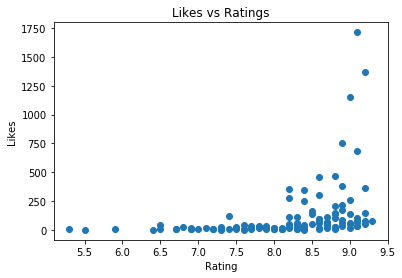

In [60]:
fig, ax = plt.subplots(1)

ax.scatter(test_1['Rating'],test_1['Likes']);
ax.set_ylabel('Likes');
ax.set_xlabel('Rating');
ax.set_title('Likes vs Ratings');

**The amount of likes seems to be exponential with Ratings** \
Another interpretation is that ratings underneath 100 are less indicative of rating; that is, almost all venues will have likes within 0 - 100. Venues that have >100 likes ARE indicative of a high rating 


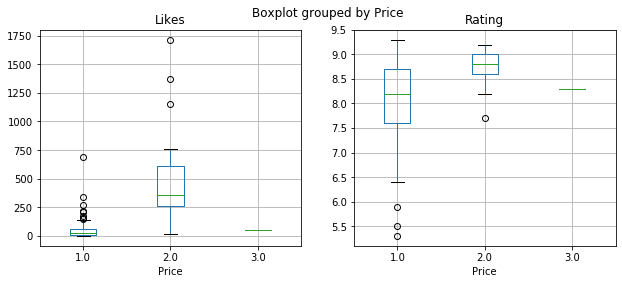

In [61]:
fig, axs = plt.subplots(1,2);
fig.set_figwidth(10);
test_1.boxplot(by='Price',column='Likes',figsize=(5,5),ax=axs[0]);
test_1.boxplot(by='Price',column='Rating',figsize=(5,5),ax=axs[1]);

**We also see (barring a few outliers), two distinct data distributions for likes based on price tier** \
So pricing gives us a solid prediction of the number of likes a venue will have. And according to the likes vs. rating scatter plot above, we can be sure it has a high rating as well. \

Another consideration to be made here, though not visualized, is that a high rating need not imply general success since a few luckily satisfied customers could have left the reviews. 'Likes' presents a more robust metric since it includes a sense for how many people agree.

**Moving forward, our metric of successful shops will be possessing likes above a given threshold**

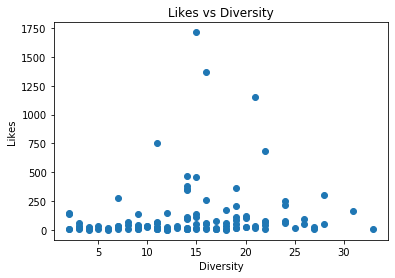

In [62]:
fig, axs = plt.subplots(1,1)

axs.scatter(test_1['Diversity'],test_1['Likes']);
axs.set_ylabel('Likes');
axs.set_xlabel('Diversity');
axs.set_title('Likes vs Diversity');

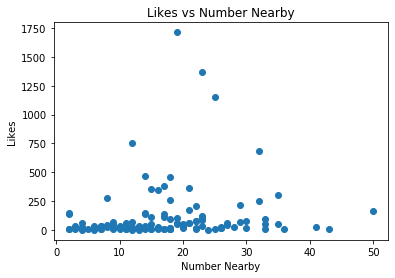

In [63]:
fig, axs = plt.subplots(1,1)

axs.scatter(test_1['Number Nearby'],test_1['Likes']);
axs.set_ylabel('Likes');
axs.set_xlabel('Number Nearby');
axs.set_title('Likes vs Number Nearby');

0.0    79
1.0    29
2.0    11
3.0     4
Name: Competition, dtype: int64

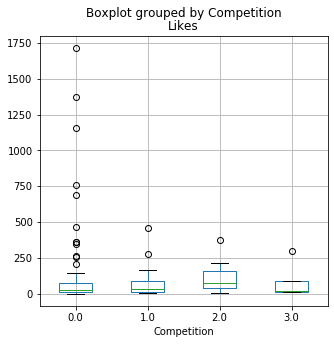

In [64]:
test_2 = test_1.replace(-1.0,0.0)
test_2.boxplot(by='Competition',column='Likes',figsize=(5,5));

test_2['Competition'].value_counts()

**Only slight groupings in each of the nearby metrics, but definitely visible**

Now I need to convert the nearby categories into one-hot values in order for them to be compatible with machine learning algorithms

In [66]:
dummy_1 = test_1['1st Closest'].tolist()
dummy_1 = pd.get_dummies(dummy_1)
dummy_1.reset_index(drop=True,inplace=True)
                         
dummy_2 = test_1['2nd Closest'].tolist()
dummy_2 = pd.get_dummies(dummy_2)
dummy_2.reset_index(drop=True,inplace=True)

dummy_3 = test_1['3rd Closest'].tolist()
dummy_3 = pd.get_dummies(dummy_3)
dummy_3.reset_index(drop=True,inplace=True)

dummy_4 = test_1['4th Closest'].tolist()
dummy_4 = pd.get_dummies(dummy_4)
dummy_4.reset_index(drop=True,inplace=True)

dummy_5 = test_1['5th Closest'].tolist()
dummy_5 = pd.get_dummies(dummy_5)
dummy_5.reset_index(drop=True,inplace=True)

df = pd.concat([dummy_1,dummy_2,dummy_3,dummy_4,dummy_5],axis=1)
df2 = df.transpose()

cats = df2.index.to_frame()
cats.columns = ['Categories']

df3 = pd.concat([cats,df2],axis=1)
df3.set_index('Categories')
df4 = df3.groupby('Categories',axis=0).sum()
df4 = df4.transpose()

In [67]:
test_3 = pd.concat([test_2,df4],axis=1)
test_3

,id,Venue,Latitude,Longitude,Category,Likes,Price,Rating,Diversity,Competition,...,Tourist Information Center,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,5d094cd247f876002c7ec6d2,Panera Bread,33.917750,-118.065352,Coffee Shop,1.0,1.0,7.6,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,599f8123db1d817a92eb70bd,7 Leaves Cafe,33.872932,-118.072761,Coffee Shop,17.0,1.0,8.3,15.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,5c1d8c70340a58002c249daf,Philz Coffee,33.761676,-118.137816,Coffee Shop,9.0,1.0,8,33.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,524b969a11d2c949b514bd2a,Tierra Mia Coffee,33.930171,-118.183456,Coffee Shop,69.0,1.0,8.6,11.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4a834324f964a5208cfa1fe3,It's A Grind Coffee House,33.811510,-118.115977,Coffee Shop,23.0,1.0,8.3,9.0,1.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,50d7e570e4b0f53596b82ab6,Barnes & Noble Café,34.153402,-118.644115,Café,0.0,1.0,6.4,12.0,0.0,...,0,0,0,0,0,0,0,0,0,0
119,5ab4a38462420b3209f7511a,Bluestone Lane,34.021440,-118.495910,Café,30.0,1.0,8.7,18.0,0.0,...,0,0,0,0,0,0,0,0,0,0
120,5154f8fde889ae67b8016eb7,Demitasse,34.018550,-118.499679,Café,254.0,2.0,8.4,24.0,0.0,...,0,0,0,0,0,0,0,0,0,0
121,4fff4694d86ca830b838b5cc,Dogtown Coffee,34.007124,-118.488723,Café,343.0,1.0,8.4,14.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
test_final = test_3.drop(columns=['id','Venue','Category','Latitude','Longitude','1st Closest','2nd Closest','3rd Closest','4th Closest','5th Closest'])

## Final data set

In [69]:
test_final = test_final.astype({'Likes': int,'Price':int,'Diversity':int,'Competition':int,'Number Nearby':int})
test_final

,Likes,Price,Rating,Diversity,Competition,Number Nearby,,Accessories Store,Airport Lounge,American Restaurant,...,Tourist Information Center,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,1,1,7.6,6,0,6,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,17,1,8.3,15,1,22,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,1,8,33,3,43,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,69,1,8.6,11,0,12,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,23,1,8.3,9,1,12,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0,1,6.4,12,0,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119,30,1,8.7,18,0,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,254,2,8.4,24,0,32,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
121,343,1,8.4,14,0,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Comprehensive scatter visualization**

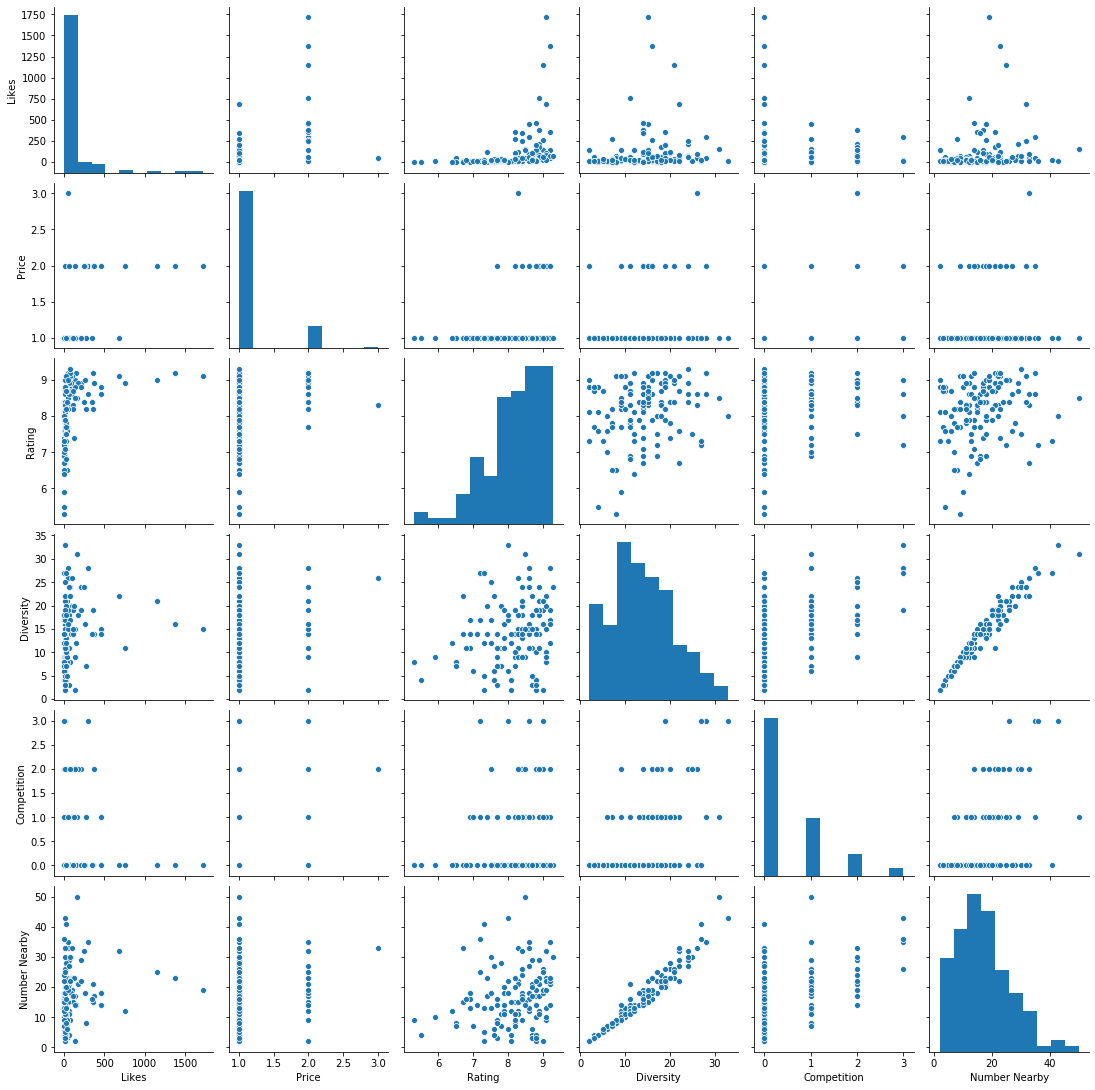

In [72]:
sns.pairplot(test_final[['Likes','Price','Rating','Diversity','Competition','Number Nearby']]);

# Review  Method
(1) Bisect data based on threshold number of likes to create 'Successful' label \
(2) Train a machine learning model (try svm and log refression) to predict a subset of the data \
(3) Apply model to a variety of new venus spread across geography

In [73]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# Try SVM

Using number of likes as a label for success

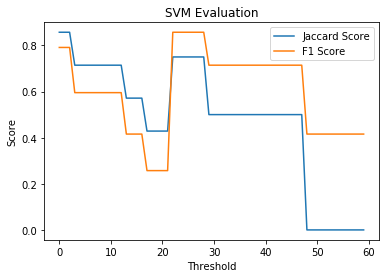

In [216]:
learning_df = test_final.drop(columns='Rating')
jscores = []
fscores = []

for thresh in np.linspace(1,60,60):
    threshold = thresh
    labels = learning_df[['Likes']]

    success = []
    # defining labels based on threshold
    for index, likes in enumerate(labels['Likes']):
        if (likes > threshold):
            success.append(1);
        else:
            success.append(0);
        
    features = learning_df.drop(columns=['Likes','Price']);
    X = np.asarray(features);
    Y = success

    # training and test split
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.05,random_state=1)
    
    # creating and utilizing model
    clf = svm.SVC(kernel='rbf');
    clf.fit(x_train,y_train);

    yhat = clf.predict(x_test);
    
    #include a scoring step
    jscore = jaccard_score(y_test, yhat);
    fscore = f1_score(y_test, yhat, average='weighted') 
    jscores.append(jscore)
    fscores.append(fscore)
    
    
plt.plot(jscores);
plt.plot(fscores);

plt.legend(['Jaccard Score','F1 Score']);
plt.xlabel('Threshold');
plt.ylabel('Score');
plt.title('SVM Evaluation');

**How sensitive is this to this particular training sample**

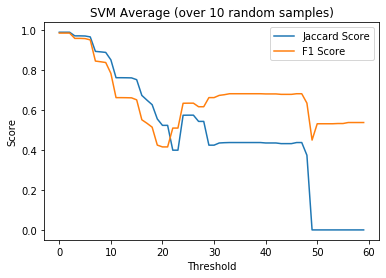

In [234]:
learning_df = test_final.drop(columns='Rating')
j_ave = np.zeros(60)
f_ave = np.zeros(60)

for random_state in [0,1,2,3,4,5,6,7,8,9]:

    jscores = []
    fscores = []
    for thresh in np.linspace(1,60,60):
        threshold = thresh
        labels = learning_df[['Likes']]

        success = []
        # defining labels based on threshold
        for index, likes in enumerate(labels['Likes']):
            if (likes > threshold):
                success.append(1);
            else:
                success.append(0);
        
        features = learning_df.drop(columns=['Likes','Price']);
        X = np.asarray(features);
        Y = success

        # training and test split
        x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.05,random_state=random_state)
    
        # creating and utilizing model
        clf = svm.SVC(kernel='rbf');
        clf.fit(x_train,y_train);

        yhat = clf.predict(x_test);
    
        #include a scoring step
        jscore = jaccard_score(y_test, yhat);
        fscore = f1_score(y_test, yhat, average='weighted') 
        jscores.append(jscore)
        fscores.append(fscore)
    
    j_ave = np.add(j_ave,np.asarray(jscores))/2
    f_ave = np.add(f_ave,np.asarray(fscores))/2
    
plt.plot(j_ave);
plt.plot(f_ave);

plt.legend(['Jaccard Score','F1 Score']);
plt.xlabel('Threshold');
plt.ylabel('Score');
plt.title('SVM Average (over 10 random samples)');


# Try Logistic Regression

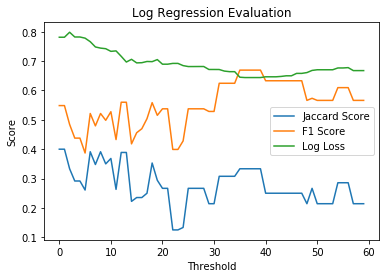

In [231]:
learning_df = test_final.drop(columns='Rating')
jscores = [];
fscores = [];
logloss = [];

for thresh in np.linspace(1,60 ,60):
    threshold = thresh
    labels = learning_df[['Likes']]

    success = []
    # defining labels based on threshold
    for index, likes in enumerate(labels['Likes']):
        if (likes > threshold):
            success.append(1);
        else:
            success.append(0);
        
    X = np.asarray(learning_df.drop(columns=['Likes','Price']));
    Y = success

    # pre-processing
    X = preprocessing.StandardScaler().fit(X).transform(X)
    
    # training and test split
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=6)
    
    # creating and utilizing model
    LR = LogisticRegression(C=0.01, solver='liblinear',class_weight='balanced').fit(x_train,y_train)

    yhat = LR.predict(x_test);
    yhat_prob = LR.predict_proba(x_test)
        
    
    #include a scoring step
    jscore = jaccard_score(y_test, yhat);
    fscore = f1_score(y_test, yhat, average='weighted') 
    loss = log_loss(y_test,yhat_prob)
    jscores.append(jscore)
    fscores.append(fscore)
    logloss.append(loss)
    
plt.plot(jscores);
plt.plot(fscores);
plt.plot(logloss);
plt.legend(['Jaccard Score','F1 Score','Log Loss']);
plt.xlabel('Threshold');
plt.ylabel('Score');
plt.title('Log Regression Evaluation');


# Use model to predict new areas for business

To anchor this search, we'll use variety of venues that we had seen from the training set

In [78]:
categories = test_final.drop(columns=['Price','Rating','Diversity','Competition','Number Nearby'])
successes = categories[categories['Likes']>50] 
successes = successes.drop(columns='Likes')
cat_counts = successes.sum().to_frame()
counts_sorted = cat_counts.sort_values(0,ascending=False)
counts_sorted = counts_sorted[counts_sorted[0]!=0]
counts_sorted

,0
,15
Café,10
Pizza Place,9
Sandwich Place,8
Coffee Shop,7
...,...
Fried Chicken Joint,1
French Restaurant,1
Plaza,1
Food Stand,1


**Sandwich, clothing and pizza shops are frequent neighbors** \
**Dive bars and drug stores are not popular neighbors**

In [79]:
radius = 100000

sandwich = '4bf58dd8d48988d1c5941735'
clothing = '4bf58dd8d48988d103951735'
pizza = '4bf58dd8d48988d1ca941735'
dive = '4bf58dd8d48988d118941735'
drug = '5745c2e4498e11e7bccabdbd'


category_list = [sandwich,clothing,pizza]
potential_spots = pd.DataFrame({'id':[], 'Venue':[], 'Latitude':[], 'Longitude':[], 'Category':[]});

for cat in category_list:
    url = url_base + 'venues/search?' + url_cred + '&near={}&intent=browse&categoryId={}&radius={}&limit=10'.format(
        address,
        cat,
        radius
        )


    df = requests.get(url).json()['response']

    venues_list=[]
    venues_list.append([( 
            df['venues'][n]['id'],
            df['venues'][n]['name'], 
            df['venues'][n]['location']['lat'], 
            df['venues'][n]['location']['lng'],  
            df['venues'][n]['categories'][0]['name']) for n,v in enumerate(df['venues'])])

    venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venues.columns = ['id',
                      'Venue', 
                      'Latitude', 
                      'Longitude', 
                      'Category']

    potential_spots = pd.concat([potential_spots,venues],axis=0)
    
potential_spots

,id,Venue,Latitude,Longitude,Category
0,4b384f95f964a520844d25e3,The Trails,34.113974,-118.307638,Coffee Shop
1,4c92ff842bf7b60c23b0670a,Fat Sal's,34.062517,-118.448027,Sandwich Place
2,51d4809b498e3f65e78dcfd4,Fat Sal's,34.094536,-118.338136,Sandwich Place
3,4c7c90f2247cb60cfc965e5e,Subway #35527,34.071793,-117.963576,Sandwich Place
4,59b79e90f00a705ba4bed9c9,JOE & THE JUICE,34.081831,-118.377839,Juice Bar
5,5037b4dee4b02b479d3e8dc8,Alfred Coffee & Kitchen,34.083515,-118.374341,Coffee Shop
6,4bea1b536295c9b65e218608,Subway,34.170877,-118.570047,Sandwich Place
7,4470358df964a52089331fe3,Philippe The Original,34.059622,-118.237013,Sandwich Place
8,54d27e84498e26dc9e8eceac,Panera Bread,33.997865,-118.394822,Bakery
9,4c72da88ad69b60c5b9e84b9,Apple Spice Junction,33.662591,-117.704520,Sandwich Place


**Let's repeat the data processing steps taken above for coffee shops=**

In [80]:
radius=200

nearby_venues = pd.DataFrame({'id':[], 'Venue':[], 'Latitude':[], 'Longitude':[], 'Category':[], 'Distance':[]});
nearby_df = pd.DataFrame({'Diversity':[], 'Competition':[], 'Number Nearby':[]})
closest_venues = pd.DataFrame({'1st Closest':[],'2nd Closest':[],'3rd Closest':[],'4th Closest':[],'5th Closest':[]})

for latitude, longitude in zip(potential_spots['Latitude'],potential_spots['Longitude']):
    url = url_base + 'venues/explore?' + url_cred + '&ll={},{}&radius={}&limit=50'.format(
        latitude,
        longitude,
        radius)
    
    df = requests.get(url).json()['response']['groups'][0]['items']
    
    venues_list=[]
    if(len(df) > 0):
        venues_list.append([( 
            df[n]['venue']['id'],
            df[n]['venue']['name'], 
            df[n]['venue']['location']['lat'], 
            df[n]['venue']['location']['lng'],  
            df[n]['venue']['categories'][0]['name'],
            df[n]['venue']['location']['distance']) for n,v in enumerate(df)])
    venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])

    venues.columns = ['id',
                      'Venue', 
                      'Latitude', 
                      'Longitude', 
                      'Category',
                      'Distance']
    venues = venues.sort_values('Distance')
    venues.reset_index(drop=True,inplace=True)

    if (len(venues['Category'].values) - 1)>=5:
        closest = pd.DataFrame([(venues['Category'].values[1],
                                 venues['Category'].values[2],
                                 venues['Category'].values[3],
                                 venues['Category'].values[4],
                                 venues['Category'].values[5])])
    else:
        closest = pd.DataFrame([('','','','','')])
    
    closest.columns = ['1st Closest',
                       '2nd Closest',
                       '3rd Closest',
                       '4th Closest',
                       '5th Closest']
    closest_venues = pd.concat([closest_venues,closest])

    div = len(venues['Category'].unique())
    comp = len(venues[venues['Category']=='Coffee Shop']) - 1
    num_places = venues.shape[0]

    nearby_metrics = pd.DataFrame([(int(div),int(comp),int(num_places))])
    nearby_metrics.columns = ['Diversity',
                              'Competition',
                              'Number Nearby']

    nearby_df = pd.concat([nearby_df,nearby_metrics])

closest_venues.reset_index(drop=True,inplace=True)
nearby_df.reset_index(drop=True,inplace=True)
final_metrics = pd.concat([nearby_df,closest_venues],axis=1)
final_metrics

,Diversity,Competition,Number Nearby,1st Closest,2nd Closest,3rd Closest,4th Closest,5th Closest
0,2.0,0.0,2.0,,,,,
1,22.0,0.0,26.0,Korean Restaurant,Mediterranean Restaurant,Café,Chinese Restaurant,Coffee Shop
2,13.0,0.0,14.0,Sushi Restaurant,Convenience Store,Electronics Store,Fast Food Restaurant,Rental Car Location
3,7.0,-1.0,8.0,Big Box Store,Big Box Store,Grocery Store,Mexican Restaurant,American Restaurant
4,18.0,-1.0,23.0,Clothing Store,Clothing Store,Boutique,Sporting Goods Shop,Clothing Store
5,22.0,0.0,32.0,Spa,Food Truck,Café,Women's Store,Plaza
6,18.0,0.0,19.0,Sushi Restaurant,Chinese Restaurant,Bank,Bagel Shop,Coffee Shop
7,11.0,-1.0,16.0,Tea Room,Café,Chinese Restaurant,Cajun / Creole Restaurant,Spa
8,14.0,0.0,15.0,Mobile Phone Shop,Mobile Phone Shop,Kids Store,Pet Store,Department Store
9,2.0,-1.0,2.0,,,,,


In [81]:
potential_spots.reset_index(drop=True,inplace=True)
imp_set = pd.concat([potential_spots,final_metrics],axis=1)
imp_set

,id,Venue,Latitude,Longitude,Category,Diversity,Competition,Number Nearby,1st Closest,2nd Closest,3rd Closest,4th Closest,5th Closest
0,4b384f95f964a520844d25e3,The Trails,34.113974,-118.307638,Coffee Shop,2.0,0.0,2.0,,,,,
1,4c92ff842bf7b60c23b0670a,Fat Sal's,34.062517,-118.448027,Sandwich Place,22.0,0.0,26.0,Korean Restaurant,Mediterranean Restaurant,Café,Chinese Restaurant,Coffee Shop
2,51d4809b498e3f65e78dcfd4,Fat Sal's,34.094536,-118.338136,Sandwich Place,13.0,0.0,14.0,Sushi Restaurant,Convenience Store,Electronics Store,Fast Food Restaurant,Rental Car Location
3,4c7c90f2247cb60cfc965e5e,Subway #35527,34.071793,-117.963576,Sandwich Place,7.0,-1.0,8.0,Big Box Store,Big Box Store,Grocery Store,Mexican Restaurant,American Restaurant
4,59b79e90f00a705ba4bed9c9,JOE & THE JUICE,34.081831,-118.377839,Juice Bar,18.0,-1.0,23.0,Clothing Store,Clothing Store,Boutique,Sporting Goods Shop,Clothing Store
5,5037b4dee4b02b479d3e8dc8,Alfred Coffee & Kitchen,34.083515,-118.374341,Coffee Shop,22.0,0.0,32.0,Spa,Food Truck,Café,Women's Store,Plaza
6,4bea1b536295c9b65e218608,Subway,34.170877,-118.570047,Sandwich Place,18.0,0.0,19.0,Sushi Restaurant,Chinese Restaurant,Bank,Bagel Shop,Coffee Shop
7,4470358df964a52089331fe3,Philippe The Original,34.059622,-118.237013,Sandwich Place,11.0,-1.0,16.0,Tea Room,Café,Chinese Restaurant,Cajun / Creole Restaurant,Spa
8,54d27e84498e26dc9e8eceac,Panera Bread,33.997865,-118.394822,Bakery,14.0,0.0,15.0,Mobile Phone Shop,Mobile Phone Shop,Kids Store,Pet Store,Department Store
9,4c72da88ad69b60c5b9e84b9,Apple Spice Junction,33.662591,-117.704520,Sandwich Place,2.0,-1.0,2.0,,,,,


I need to perform a slightly different process to create the one-hot matrix because these need to be comprised of exactly the same columns in order to be compatible with the model we trained \

We'll use the old matrix we made, resize it to our implementation set, initialize it with zeros, and fill in values by looping through the closest venues found above

In [82]:
df4[df4>0] = 0
df4_new = df4[0:len(imp_set)]
df4_new

col_list = ['1st Closest','2nd Closest','3rd Closest','4th Closest','5th Closest']

for x in col_list:
    for i,n in enumerate(imp_set[x]):
        if n in df4_new.columns:
            df4_new[n][i]+=1
            
df4_new

C:\Users\Roland\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Categories,,Accessories Store,Airport Lounge,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Tourist Information Center,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
imp_set = pd.concat([imp_set,df4_new],axis=1)


In [84]:
imp_set_short = imp_set.drop(columns=['id','Venue','Category','Latitude','Longitude','1st Closest','2nd Closest','3rd Closest','4th Closest','5th Closest'])
imp_set_short = imp_set_short.astype({'Diversity':int,'Competition':int,'Number Nearby':int})
imp_set_short

,Diversity,Competition,Number Nearby,,Accessories Store,Airport Lounge,American Restaurant,Antique Shop,Arcade,Art Gallery,...,Tourist Information Center,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,2,0,2,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22,0,26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,0,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,-1,8,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,-1,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,22,0,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,18,0,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11,-1,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,14,0,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,-1,2,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Feed into our model**

In [214]:
implementation = np.asarray(imp_set_short)

yhat = LR.predict(implementation);
yhat_prob = LR.predict_proba(implementation)

prob_list = [] 
for prob in range(0,len(yhat_prob)):
    prob_list.append(yhat_prob[prob][1])

**Create a heat map visualization of the new locations**

In [189]:
# create map of Manhattan using latitude and longitude values
heat_map = folium.Map(location=[la_latitude, la_longitude], zoom_start=9,tiles='Stamen Toner')

# set color scheme for the probabilities
x = np.arange(len(prob_list))
ys = [i + x + (i*x)**2 for i in range(len(prob_list))]
colors_array = cm.coolwarm(np.linspace(0, 1, len(ys)))
heat = [colors.rgb2hex(i) for i in colors_array]

In [190]:
# add markers to map
for x, y, z, a in zip(imp_set['Latitude'], imp_set['Longitude'], imp_set['Venue'], prob_list):
    label = folium.Popup(z, parse_html=True)
    folium.CircleMarker(
        [x, y],
        radius=5,
        popup=label,
        color=heat[prob_list.index(a)],
        fill=True,
        fill_color=heat[prob_list.index(a)],
        fill_opacity=0.9).add_to(heat_map)  

heat_map

C:\Users\Roland\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


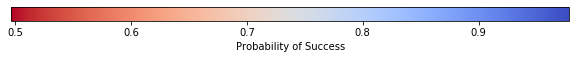

In [212]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(10, 0.5))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=min(prob_list), vmax=max(prob_list))

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cm.coolwarm_r,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Probability of Success')
fig.show()